# Predicting Real Estate Prices in the Philippines Using Random Forest Regression
---
## 1. Problem Definition
The real estate industry plays a vital role in the Philippine economy, with property values influenced by numerous factors such as location, size, number of rooms, and property type. Accurately predicting real estate prices can help buyers, sellers, and investors make data-driven decisions and ensure fair market valuation.

This project applies Random Forest Regressor to predict house prices in the Philippines using various property-related features from the Kaggle dataset “Real Estate Price in the Philippines.” The project aims to model the nonlinear relationships between these features and property prices 


### Objectives
- To train a Random Forest Regression model for predicting property prices.
- To analyze the relationship between property features and their market prices.
- To determine the most important features affecting real estate prices.
---
## 2. Data Collection
The dataset used in this study is titled “Real Estate Price in the Philippines”, sourced from Kaggle. It contains real estate property listings collected from various sources across the Philippines, including property-selling websites and market reports. Each record represents a property, with corresponding features such as price, location, number of bedrooms, bathrooms, and area. The data captures the key characteristics influencing housing value and reflects current trends in the Philippine real estate market.

In [105]:
# Importing necessary libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Instantiating the DataFrame and number of rows and columns
df = pd.read_csv('properties.csv')
df.shape

(3000, 14)

---

## 3. Data Cleaning
Before applying any machine learning model, it is essential to ensure that the dataset is accurate, consistent, and free of errors. The raw real estate dataset may contain missing values, duplicates, or inconsistent formats that can affect the performance of the regression model.
Data cleaning helps improve the quality of the data, making it reliable for analysis and model training.



In [133]:
df.head()

,Land Size(M2),Building Size(M2),Bedrooms,Bathrooms,Longitude,Latitude,Price(Php),Category_Apartment,Category_Commercial,Category_Condominium,Category_House,Category_Land,"Sub-Category_Apartment,apartments","Sub-Category_Apartment,loft","Sub-Category_Apartment,room-1","Sub-Category_Commercial,building","Sub-Category_Commercial,coworking","Sub-Category_Commercial,offices","Sub-Category_Commercial,retail","Sub-Category_Commercial,serviced-office","Sub-Category_Commercial,warehouse","Sub-Category_Condominium,3-bedroom","Sub-Category_Condominium,4-bedroom","Sub-Category_Condominium,dormitory","Sub-Category_Condominium,double-bedroom","Sub-Category_Condominium,loft-1","Sub-Category_Condominium,other-4","Sub-Category_Condominium,penthouse-1","Sub-Category_Condominium,single-bedroom","Sub-Category_Condominium,studio","Sub-Category_House,beach-house","Sub-Category_House,single-family-house","Sub-Category_House,townhouse","Sub-Category_House,villas","Sub-Category_Land,agricutural-lot","Sub-Category_Land,beach-lot","Sub-Category_Land,commercial-lot","Sub-Category_Land,memorial-lot","Sub-Category_Land,residential-lot",Location_Cluster
0,84.3,128.0,3.0,2.0,121.055300,14.537120,19000000.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
1,101.0,60.0,3.0,2.0,120.665111,15.169115,3700000.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,7
2,100.0,75.0,3.0,2.0,125.534347,7.090939,3790000.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,3
3,1215.5,728.0,7.0,7.2,120.470266,17.430680,3066000.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,5
4,537.0,386.0,4.4,4.6,121.379905,13.691466,20191200.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,0


### 3.1 Removing Irrelevant Columns
Some columns in the dataset do not contribute useful information for predicting property prices. These features may contain text, URLs, or identifiers that do not influence the numerical outcome of the regression model.

- Description – This column contains long text descriptions of the property (e.g., “Spacious condo near Makati with pool and gym”). While helpful for marketing, the text is unstructured and not directly useful for numerical regression.
- Link – This is a URL directing to the property listing page. It has no relationship to price and adds unnecessary noise.
- Condominium Name – This column has a 

In [107]:
# dropping irrelevant columns
df = df.drop(['Description', 'Link'], axis=1)
df.shape


(3000, 12)

### 3.2 Checking for Missing Values
This step involves quantifying the presence and extent of missing data (e.g., $\text{NaNs}$ or nulls) across all features. It's the initial assessment to understand data completeness before imputation or exclusion.

In [108]:
# checking the total number of missing values in each column
df.isnull().sum()

Location                0
Category                0
Sub-Category            0
Land Size(M2)         869
Building Size(M2)     708
Car Space            1899
Bedrooms              920
Bathrooms             970
Longitude               1
Latitude                1
Condominum Name      2191
Price(Php)              0
dtype: int64

In [109]:
# checking the percentage of missing values in each column
df.isnull().sum() / len(df) * 100

Location              0.000000
Category              0.000000
Sub-Category          0.000000
Land Size(M2)        28.966667
Building Size(M2)    23.600000
Car Space            63.300000
Bedrooms             30.666667
Bathrooms            32.333333
Longitude             0.033333
Latitude              0.033333
Condominum Name      73.033333
Price(Php)            0.000000
dtype: float64

Several columns contained missing values. The columns 'Condominum Name' and 'Car Space missing' exhibit a high percentage of missing data and are unlikely to significantly affect price prediction across all locations. Retaining them could introduce data sparsity and bias the model.

In [110]:
# dropping columns with high missing values
df = df.drop(['Car Space', 'Condominum Name'], axis=1)
df.shape

(3000, 10)

Since only a single row (or a small, manageable number) had missing $\text{Longitude}$ and $\text{Latitude}$ values, these were manually updated using an external lookup tool. This method ensures high accuracy and consistency for the critical geographic features that will be used in the model.

In [111]:
# 1. Identify the row(s) with missing coordinates
missing_coords_df = df[df['Longitude'].isnull() | df['Latitude'].isnull()]

# 2. Check the location name of the missing row(s)
# The output of this will help manually find the correct coordinates
print("Location(s) with missing coordinates:")
print(missing_coords_df[['Location', 'Longitude', 'Latitude']])

Location(s) with missing coordinates:
             Location  Longitude  Latitude
337  Songculan, Dauis        NaN       NaN


In [112]:
# 3. manually fill in the missing coordinates based on external lookup since only 1 row is missing and latitude and longitude needs to be accurate
df.loc[df['Location'] == 'Songculan, Dauis', 'Longitude'] = 123.8294
df.loc[df['Location'] == 'Songculan, Dauis', 'Latitude'] = 9.6291

df.loc[df['Location'] == 'Songculan, Dauis', ['Location', 'Longitude', 'Latitude']]

,Location,Longitude,Latitude
337,"Songculan, Dauis",123.8294,9.6291




The other remaining key features (e.g., Land Size, Building Size, Bedrooms, Bathrooms) can be imputed using the KNN as these are essential for prediction.

#### 3.3 Handling Outliers
Outliers significantly skew the median and mean. By handling them first, the median for imputation will be more representative of the typical property values. Below is the table showing the statistics.

In [113]:
outlier_data = []
cols_to_check = ['Land Size(M2)', 'Building Size(M2)', 'Bedrooms', 'Bathrooms', 'Price(Php)']

for col in cols_to_check:
    # Calculate IQR bounds
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    
    # Calculate additional statistics
    total_count = df[col].count()
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / total_count * 100) if total_count > 0 else 0
    
    outlier_data.append({
        'Column': col,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Total Values': total_count,
        'Outlier Count': outlier_count,
        'Outlier %': outlier_percentage
    })

outlier_summary = pd.DataFrame(outlier_data)

outlier_summary

,Column,Q1,Q3,IQR,Lower Bound,Upper Bound,Total Values,Outlier Count,Outlier %
0,Land Size(M2),1.205000e+02,558.5,4.380000e+02,-5.365000e+02,1.215500e+03,2131,281,13.186298
1,Building Size(M2),6.000000e+01,330.0,2.700000e+02,-3.450000e+02,7.350000e+02,2292,272,11.867365
2,Bedrooms,2.000000e+00,4.0,2.000000e+00,-1.000000e+00,7.000000e+00,2080,63,3.028846
3,Bathrooms,1.000000e+00,4.0,3.000000e+00,-3.500000e+00,8.500000e+00,2030,46,2.266010
4,Price(Php),6.330976e+06,48000000.0,4.166902e+07,-5.617256e+07,1.105035e+08,3000,362,12.066667


The table below represents the analysis of outliers using boxplot for each column with missing values. It also shows Interquartile Range (IQR) bounds and the percentage of outliers detected in each numerical column.

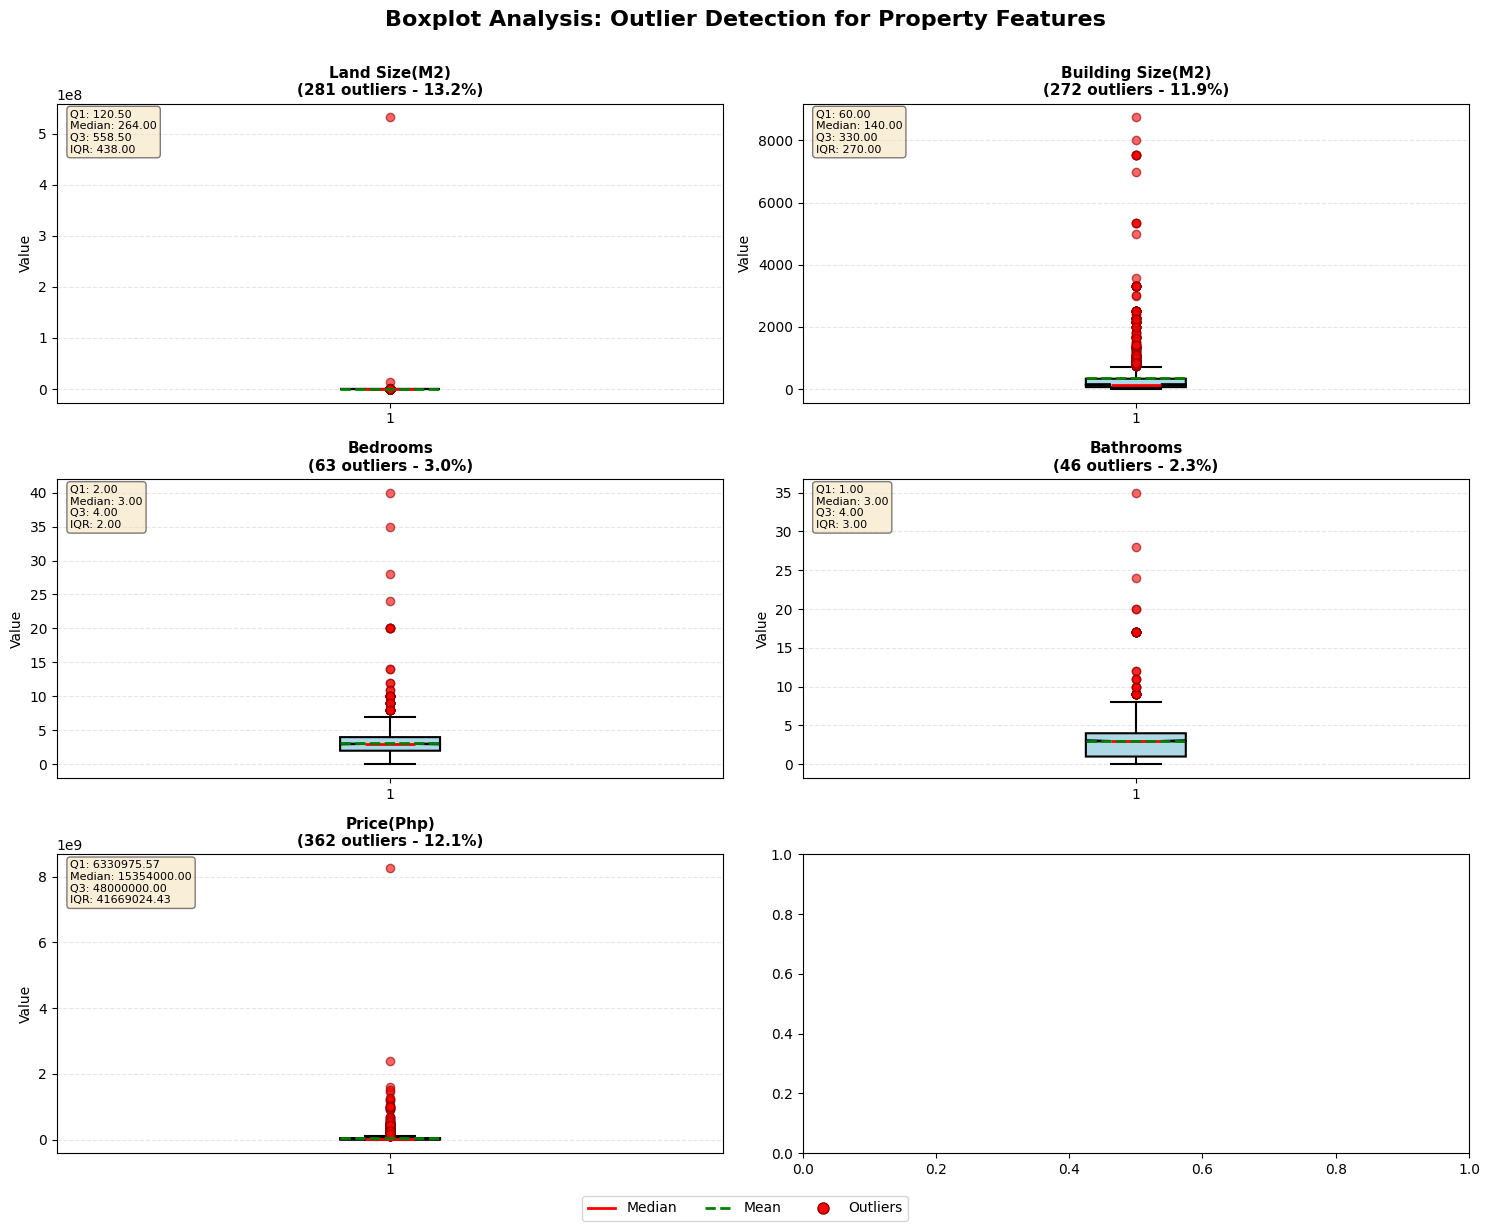

In [114]:
# Create boxplots to visualize outliers
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Boxplot Analysis: Outlier Detection for Property Features', 
             fontsize=16, fontweight='bold', y=0.995)

axes = axes.flatten()

for idx, col in enumerate(cols_to_check):
    ax = axes[idx]
    
    # Create boxplot
    bp = ax.boxplot(df[col].dropna(), 
                    vert=True, 
                    patch_artist=True,
                    notch=True,
                    showmeans=True,
                    meanline=True,
                    boxprops=dict(facecolor='lightblue', edgecolor='black', linewidth=1.5),
                    whiskerprops=dict(color='black', linewidth=1.5),
                    capprops=dict(color='black', linewidth=1.5),
                    medianprops=dict(color='red', linewidth=2),
                    meanprops=dict(color='green', linewidth=2, linestyle='--'),
                    flierprops=dict(marker='o', markerfacecolor='red', markersize=6, 
                                  alpha=0.6, markeredgecolor='darkred'))
    
    # Get outlier info for this column
    outlier_info = outlier_summary[outlier_summary['Column'] == col].iloc[0]
    
    # Add title with outlier count
    ax.set_title(f"{col}\n({int(outlier_info['Outlier Count'])} outliers - {outlier_info['Outlier %']:.1f}%)", 
                fontsize=11, fontweight='bold')
    ax.set_ylabel('Value', fontsize=10)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Add text box with statistics
    stats_text = (f"Q1: {outlier_info['Q1']:.2f}\n"
                 f"Median: {df[col].median():.2f}\n"
                 f"Q3: {outlier_info['Q3']:.2f}\n"
                 f"IQR: {outlier_info['IQR']:.2f}")
    
    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes,
           fontsize=8, verticalalignment='top',
           bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Add legend
legend_elements = [
    plt.Line2D([0], [0], color='red', linewidth=2, label='Median'),
    plt.Line2D([0], [0], color='green', linewidth=2, linestyle='--', label='Mean'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', 
               markersize=8, label='Outliers', markeredgecolor='darkred')
]
fig.legend(handles=legend_elements, loc='lower center', ncol=3, 
          bbox_to_anchor=(0.5, -0.02), fontsize=10, frameon=True)

plt.tight_layout(rect=[0, 0.01, 1, 0.99])
#plt.savefig('outlier_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

#### 3.3.1 Capping Outliers 
to ensure imputation reflects typical property values, outliers were capped before proceeding with KNN imputation.

In [115]:
# List of columns to cap
cols_to_cap = ['Price(Php)', 'Land Size(M2)', 'Building Size(M2)', 'Bedrooms', 'Bathrooms']

for col in cols_to_cap:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # --- Implement CAPPING (Winsorizing) ---
    # Cap values above the upper bound
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    
    # Cap values below the lower bound
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    
print("Outliers have been successfully capped in the DataFrame.")

Outliers have been successfully capped in the DataFrame.


#### 3.3.2 KNN Imputing

In [116]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# ... (Step 1: Capping code from previous response goes here) ...

# 1. Select the numerical columns that need imputation
impute_cols = ['Land Size(M2)', 'Building Size(M2)', 'Bedrooms', 'Bathrooms']
df_impute = df[impute_cols].copy()

# 2. Instantiate Scaler and Imputer
scaler = StandardScaler()
imputer = KNNImputer(n_neighbors=5) # K=5 is a common default

# 3. Scale the data (CRITICAL for KNN)
df_scaled = scaler.fit_transform(df_impute)

# 4. Apply KNN Imputation
df_imputed_scaled = imputer.fit_transform(df_scaled)

# 5. Inverse Transform back to original scale
df_imputed = scaler.inverse_transform(df_imputed_scaled)

# 6. Update the original DataFrame
df[impute_cols] = df_imputed

df.isnull().sum()

Location             0
Category             0
Sub-Category         0
Land Size(M2)        0
Building Size(M2)    0
Bedrooms             0
Bathrooms            0
Longitude            0
Latitude             0
Price(Php)           0
dtype: int64

KNN Imputation was used to preserve the complex, nonlinear relationships among real estate features.
By identifying similar property entries based on scaled distances, the model can infer realistic values for missing data.

### 3.4 Categorical Encoding
This process converts non-numeric, text-based categorical features (like 'Category', 'Location', 'Sub-Category') into a numerical format that machine learning algorithms can process.

In [117]:
# Display the first few rows of the DataFrame
df.head()

,Location,Category,Sub-Category,Land Size(M2),Building Size(M2),Bedrooms,Bathrooms,Longitude,Latitude,Price(Php)
0,"McKinley Hill, Taguig",Condominium,"Condominium,3-bedroom",84.3,128.0,3.0,2.0,121.055300,14.537120,19000000.0
1,"Sapang Maisac, Mexico",House,"House,single-family-house",101.0,60.0,3.0,2.0,120.665111,15.169115,3700000.0
2,"Catalunan Grande, Davao",House,"House,single-family-house",100.0,75.0,3.0,2.0,125.534347,7.090939,3790000.0
3,"Margaay, Narvacan",Land,"Land,agricutural-lot",1215.5,728.0,7.0,7.2,120.470266,17.430680,3066000.0
4,"Laiya-Aplaya, San Juan",Land,"Land,beach-lot",537.0,386.0,4.4,4.6,121.379905,13.691466,20191200.0


#### 3.4.1 One hot encoding Category and Sub-Category
This step turns the text entries in 'Category' and 'Sub-Category' into a series of binary (0 or 1) columns. This is necessary so the machine learning model can process them without assigning any false rank or weight.

In [118]:
# 1. Inspect unique values
print("Unique Categories:", df['Category'].unique())
print("Unique Sub-Categories:", df['Sub-Category'].unique())

Unique Categories: ['Condominium' 'House' 'Land' 'Commercial' 'Apartment']
Unique Sub-Categories: ['Condominium,3-bedroom' 'House,single-family-house'
 'Land,agricutural-lot' 'Land,beach-lot' 'Land,residential-lot'
 'Condominium,double-bedroom' 'Condominium,dormitory' 'House,villas'
 'House,townhouse' 'Land,commercial-lot' 'Condominium,loft-1'
 'Condominium,single-bedroom' 'Condominium,studio' 'Commercial,retail'
 'Land,memorial-lot' 'Commercial,building' 'Commercial,warehouse'
 'Commercial,offices' 'Condominium,4-bedroom' 'Condominium,penthouse-1'
 'Apartment,apartments' 'Condominium,other-4' 'Apartment,loft'
 'Apartment,room-1' 'House,beach-house' 'Commercial,coworking'
 'Commercial,serviced-office']


In [119]:
# List of the columns to be One-Hot Encoded
cols_to_encode = ['Category', 'Sub-Category']

# Apply One-Hot Encoding
df = pd.get_dummies(df, columns=cols_to_encode, drop_first=False)

# The original columns are now replaced by the new binary columns.
print("One-Hot Encoding complete.")
print("New columns created:")
print([col for col in df.columns if 'Category_' in col or 'Sub-Category_' in col])
print("\nFirst 5 rows of the updated DataFrame:")
print(df.head())

One-Hot Encoding complete.
New columns created:
['Category_Apartment', 'Category_Commercial', 'Category_Condominium', 'Category_House', 'Category_Land', 'Sub-Category_Apartment,apartments', 'Sub-Category_Apartment,loft', 'Sub-Category_Apartment,room-1', 'Sub-Category_Commercial,building', 'Sub-Category_Commercial,coworking', 'Sub-Category_Commercial,offices', 'Sub-Category_Commercial,retail', 'Sub-Category_Commercial,serviced-office', 'Sub-Category_Commercial,warehouse', 'Sub-Category_Condominium,3-bedroom', 'Sub-Category_Condominium,4-bedroom', 'Sub-Category_Condominium,dormitory', 'Sub-Category_Condominium,double-bedroom', 'Sub-Category_Condominium,loft-1', 'Sub-Category_Condominium,other-4', 'Sub-Category_Condominium,penthouse-1', 'Sub-Category_Condominium,single-bedroom', 'Sub-Category_Condominium,studio', 'Sub-Category_House,beach-house', 'Sub-Category_House,single-family-house', 'Sub-Category_House,townhouse', 'Sub-Category_House,villas', 'Sub-Category_Land,agricutural-lot', 'Sub

#### 3.4.2 Location Clustering

To handle the high cardinality of the Location column, a clustering approach was applied using the property’s geographic coordinates — Longitude and Latitude. Instead of encoding hundreds of unique location names, K-Means Clustering groups properties into a smaller number of location clusters based on their proximity on the map.

This means that properties located near each other (e.g., within the same city or region) are assigned to the same cluster.
By doing this, the model captures geographical influence on property prices — since properties in the same area often share similar market conditions, accessibility, and neighborhood characteristics.

The resulting Location_Cluster feature provides a numerical representation of geographic regions that the Random Forest Regression model can effectively use to improve prediction accuracy.

In [120]:
from sklearn.cluster import KMeans

# Drop 'Location' if Longitude/Latitude are present
df = df.drop('Location', axis=1)

# Cluster by geographic proximity
kmeans = KMeans(n_clusters=10, random_state=42)
df['Location_Cluster'] = kmeans.fit_predict(df[['Longitude', 'Latitude']])

df.head()

,Land Size(M2),Building Size(M2),Bedrooms,Bathrooms,Longitude,Latitude,Price(Php),Category_Apartment,Category_Commercial,Category_Condominium,Category_House,Category_Land,"Sub-Category_Apartment,apartments","Sub-Category_Apartment,loft","Sub-Category_Apartment,room-1","Sub-Category_Commercial,building","Sub-Category_Commercial,coworking","Sub-Category_Commercial,offices","Sub-Category_Commercial,retail","Sub-Category_Commercial,serviced-office","Sub-Category_Commercial,warehouse","Sub-Category_Condominium,3-bedroom","Sub-Category_Condominium,4-bedroom","Sub-Category_Condominium,dormitory","Sub-Category_Condominium,double-bedroom","Sub-Category_Condominium,loft-1","Sub-Category_Condominium,other-4","Sub-Category_Condominium,penthouse-1","Sub-Category_Condominium,single-bedroom","Sub-Category_Condominium,studio","Sub-Category_House,beach-house","Sub-Category_House,single-family-house","Sub-Category_House,townhouse","Sub-Category_House,villas","Sub-Category_Land,agricutural-lot","Sub-Category_Land,beach-lot","Sub-Category_Land,commercial-lot","Sub-Category_Land,memorial-lot","Sub-Category_Land,residential-lot",Location_Cluster
0,84.3,128.0,3.0,2.0,121.055300,14.537120,19000000.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
1,101.0,60.0,3.0,2.0,120.665111,15.169115,3700000.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,7
2,100.0,75.0,3.0,2.0,125.534347,7.090939,3790000.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,3
3,1215.5,728.0,7.0,7.2,120.470266,17.430680,3066000.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,5
4,537.0,386.0,4.4,4.6,121.379905,13.691466,20191200.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,0


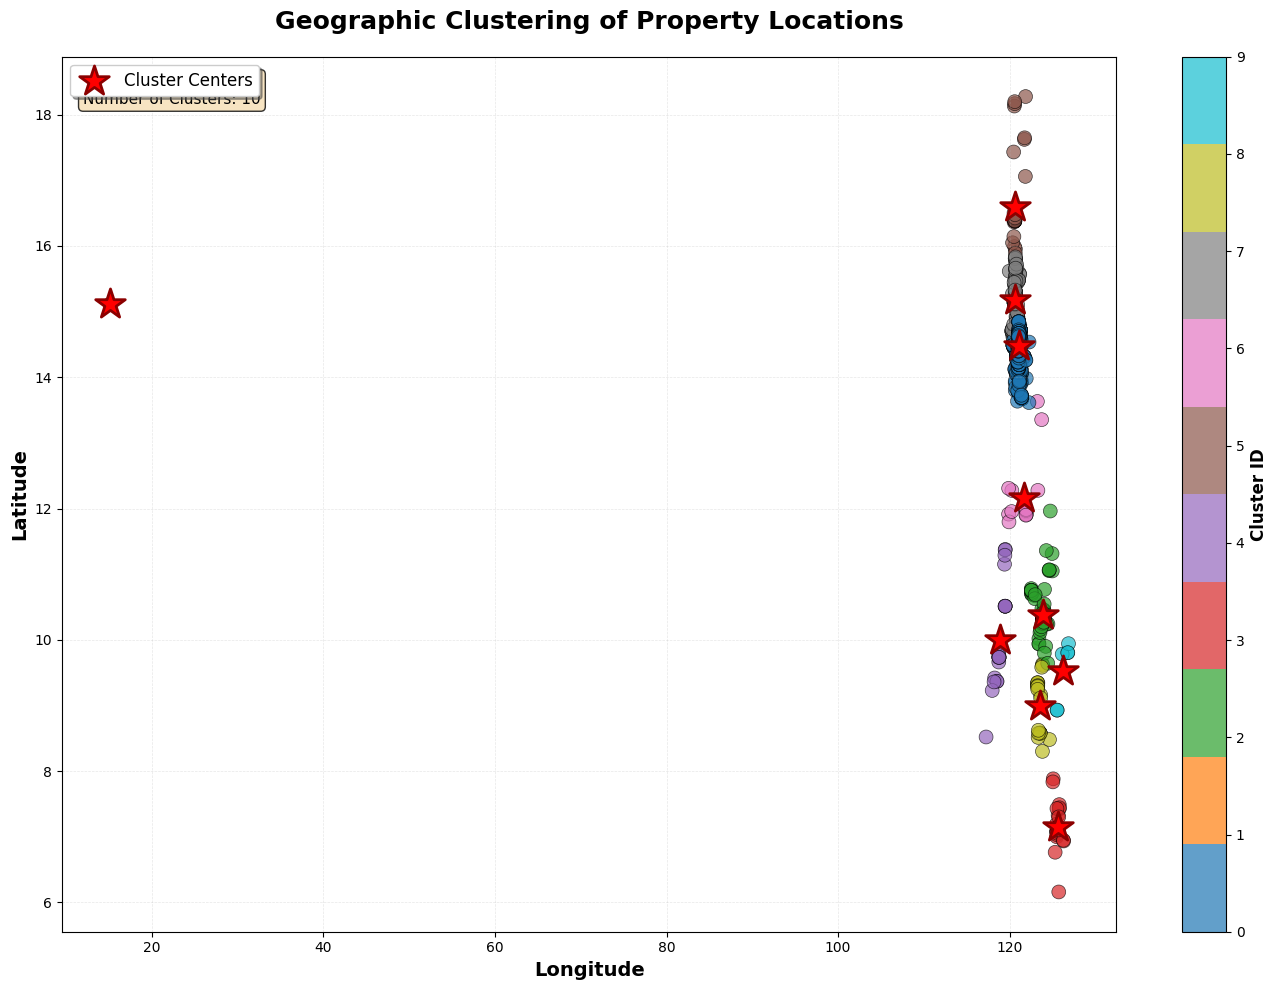


=== Cluster Statistics ===
Total properties analyzed: 3000

Properties per cluster:
  Cluster 0: 2553 properties (85.1%)
  Cluster 1: 1 properties (0.0%)
  Cluster 2: 149 properties (5.0%)
  Cluster 3: 32 properties (1.1%)
  Cluster 4: 23 properties (0.8%)
  Cluster 5: 51 properties (1.7%)
  Cluster 6: 19 properties (0.6%)
  Cluster 7: 143 properties (4.8%)
  Cluster 8: 23 properties (0.8%)
  Cluster 9: 6 properties (0.2%)

Cluster Centers (Longitude, Latitude):
  Cluster 0: (121.04, 14.47)
  Cluster 1: (15.11, 15.11)
  Cluster 2: (123.84, 10.37)
  Cluster 3: (125.61, 7.16)
  Cluster 4: (118.84, 10.00)
  Cluster 5: (120.68, 16.59)
  Cluster 6: (121.66, 12.16)
  Cluster 7: (120.64, 15.17)
  Cluster 8: (123.53, 9.00)
  Cluster 9: (126.27, 9.53)


In [121]:

# Create a larger, higher quality figure
plt.figure(figsize=(14, 10))

# Enhanced scatter plot with better styling
scatter = plt.scatter(df['Longitude'], df['Latitude'], 
                     c=df['Location_Cluster'], 
                     cmap='tab10',  # Better color palette for distinct clusters
                     s=100,  # Larger points
                     alpha=0.7,  # Slight transparency
                     edgecolors='black',  # Black borders for better visibility
                     linewidth=0.5)

# Plot cluster centers with enhanced styling
plt.scatter(kmeans.cluster_centers_[:, 0], 
           kmeans.cluster_centers_[:, 1], 
           c='red', 
           s=500,  # Larger centers
           marker='*',  # Star marker for centers
           edgecolors='darkred',
           linewidth=2,
           label='Cluster Centers',
           zorder=5)  # Ensure centers appear on top

# Enhanced title and labels
plt.title('Geographic Clustering of Property Locations', 
         fontsize=18, 
         fontweight='bold',
         pad=20)
plt.xlabel('Longitude', fontsize=14, fontweight='bold')
plt.ylabel('Latitude', fontsize=14, fontweight='bold')

# Add colorbar to show cluster assignments
cbar = plt.colorbar(scatter, label='Cluster ID')
cbar.set_label('Cluster ID', fontsize=12, fontweight='bold')

# Enhanced legend
plt.legend(fontsize=12, 
          loc='upper left',
          frameon=True,
          shadow=True,
          fancybox=True)

# Improved grid
plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)

# Add cluster statistics as text annotation
n_clusters = len(kmeans.cluster_centers_)
cluster_counts = df['Location_Cluster'].value_counts().sort_index()

stats_text = f"Total Properties: {len(df)}\nNumber of Clusters: {n_clusters}"
plt.text(0.02, 0.98, stats_text,
        transform=plt.gca().transAxes,
        fontsize=11,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

# Optional: Print cluster statistics
print("\n=== Cluster Statistics ===")
print(f"Total properties analyzed: {len(df)}")
print(f"\nProperties per cluster:")
for cluster_id in sorted(df['Location_Cluster'].unique()):
    count = len(df[df['Location_Cluster'] == cluster_id])
    percentage = (count / len(df)) * 100
    print(f"  Cluster {cluster_id}: {count} properties ({percentage:.1f}%)")

print(f"\nCluster Centers (Longitude, Latitude):")
for i, center in enumerate(kmeans.cluster_centers_):
    print(f"  Cluster {i}: ({center[0]:.2f}, {center[1]:.2f})")

In [122]:
# save the imputed DataFrame to a imputed_df.csv
df.to_csv('imputed_df.csv', index=False)

# the original columns are now replaced by the new binary columns.
print("One-Hot Encoding complete.")
df.head()

One-Hot Encoding complete.


,Land Size(M2),Building Size(M2),Bedrooms,Bathrooms,Longitude,Latitude,Price(Php),Category_Apartment,Category_Commercial,Category_Condominium,Category_House,Category_Land,"Sub-Category_Apartment,apartments","Sub-Category_Apartment,loft","Sub-Category_Apartment,room-1","Sub-Category_Commercial,building","Sub-Category_Commercial,coworking","Sub-Category_Commercial,offices","Sub-Category_Commercial,retail","Sub-Category_Commercial,serviced-office","Sub-Category_Commercial,warehouse","Sub-Category_Condominium,3-bedroom","Sub-Category_Condominium,4-bedroom","Sub-Category_Condominium,dormitory","Sub-Category_Condominium,double-bedroom","Sub-Category_Condominium,loft-1","Sub-Category_Condominium,other-4","Sub-Category_Condominium,penthouse-1","Sub-Category_Condominium,single-bedroom","Sub-Category_Condominium,studio","Sub-Category_House,beach-house","Sub-Category_House,single-family-house","Sub-Category_House,townhouse","Sub-Category_House,villas","Sub-Category_Land,agricutural-lot","Sub-Category_Land,beach-lot","Sub-Category_Land,commercial-lot","Sub-Category_Land,memorial-lot","Sub-Category_Land,residential-lot",Location_Cluster
0,84.3,128.0,3.0,2.0,121.055300,14.537120,19000000.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
1,101.0,60.0,3.0,2.0,120.665111,15.169115,3700000.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,7
2,100.0,75.0,3.0,2.0,125.534347,7.090939,3790000.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,3
3,1215.5,728.0,7.0,7.2,120.470266,17.430680,3066000.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,5
4,537.0,386.0,4.4,4.6,121.379905,13.691466,20191200.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,0


### 3.5 Handle Duplicates
This crucial step involves identifying and removing any identical rows present in the dataset. Removing duplicates ensures that each observation is unique, preventing the model from being overfit or unfairly biased towards repeated data points.

In [123]:
df_imputed = pd.read_csv('imputed_df.csv')

# Check if ANY duplicates exist
any_duplicates_imputed = df_imputed.duplicated().any()
print(f"\nAre there any duplicate rows in the imputed data? {any_duplicates_imputed}")

# Count the total number of duplicate rows
duplicate_count_imputed = df_imputed.duplicated().sum()
print(f"Total count of duplicate rows in imputed data: {duplicate_count_imputed}")


Are there any duplicate rows in the imputed data? True
Total count of duplicate rows in imputed data: 465


In [124]:
# Remove duplicate rows
df_imputed.drop_duplicates(inplace=True)

# Check if ANY duplicates exist
recheck_any_duplicates_imputed = df_imputed.duplicated().any()
print(f"\nAre there any duplicate rows in the imputed data? {recheck_any_duplicates_imputed}")

# Count the total number of duplicate rows
recheck_duplicate_count_imputed = df_imputed.duplicated().sum()
print(f"Total count of duplicate rows in imputed data: {recheck_duplicate_count_imputed}")


Are there any duplicate rows in the imputed data? False
Total count of duplicate rows in imputed data: 0


In [125]:
# saving the final cleaned DataFrame
df_imputed.to_csv('cleaned_real_estate_data.csv', index=False)

---
## 4. Exploratory Data Analysis (EDA)
In this section, the Real Estate dataset was explored to understand the structure of the data and the relationships between features that affect property prices.

The key objectives of this analysis are:
- To examine the distribution and summary statistics of key numerical variables such as **Land Size**, **Building Size**, **Bedrooms**, **Bathrooms**, and **Price (Php)**.
- To analyze how different **property categories** and **sub-categories** affect the overall pricing.
- To check for geographic relationships between **location (latitude and longitude)** and property prices.
- To identify correlations among numerical variables to guide model training.

This step helps uncover important patterns — such as whether larger land areas lead to higher prices, or how property categories differ in pricing trends.


In [126]:
# loading final cleaned DataFrame
cleaned_df = pd.read_csv('cleaned_real_estate_data.csv')

# Displaying the information about the cleaned DataFrame
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Land Size(M2)                            2535 non-null   float64
 1   Building Size(M2)                        2535 non-null   float64
 2   Bedrooms                                 2535 non-null   float64
 3   Bathrooms                                2535 non-null   float64
 4   Longitude                                2535 non-null   float64
 5   Latitude                                 2535 non-null   float64
 6   Price(Php)                               2535 non-null   float64
 7   Category_Apartment                       2535 non-null   bool   
 8   Category_Commercial                      2535 non-null   bool   
 9   Category_Condominium                     2535 non-null   bool   
 10  Category_House                           2535 no

In [127]:
cleaned_df.describe()

,Land Size(M2),Building Size(M2),Bedrooms,Bathrooms,Longitude,Latitude,Price(Php),Location_Cluster
count,2.535000e+03,2.535000e+03,2535.000000,2535.000000,2535.000000,2535.000000,2.535000e+03,2535.000000
mean,3.040072e+02,2.686401e+02,3.484168,3.340225,121.205584,14.107518,2.796384e+07,0.804734
std,3.574128e+02,2.417688e+02,1.759198,2.036756,2.308740,1.478531,3.352368e+07,2.001217
min,5.684342e-14,2.842171e-14,0.000000,0.000000,15.113011,6.159605,1.000000e+00,0.000000
25%,6.720000e+01,6.700000e+01,2.000000,2.000000,120.996723,14.305551,5.900000e+06,0.000000
50%,1.500000e+02,1.720000e+02,3.000000,3.000000,121.038853,14.540867,1.235400e+07,0.000000
75%,3.750000e+02,4.220000e+02,4.400000,4.200000,121.081817,14.591735,3.500000e+07,0.000000
max,1.215500e+03,7.350000e+02,7.000000,8.500000,126.862440,18.275275,1.105035e+08,9.000000


#### Takeaways
- The Non-Null Count column confirms that all 2535 rows have non-null values. This means KNNImputer and categorical imputation steps successfully filled all missing data.
- All features are now numerical (float64 or uint8) and boolean. This is the required format for Scikit-learn models like Random Forest.



### 4.2 Histogram
The histogram illustrates the distribution of the final, cleaned target variable, $\text{Price(Php)}$.

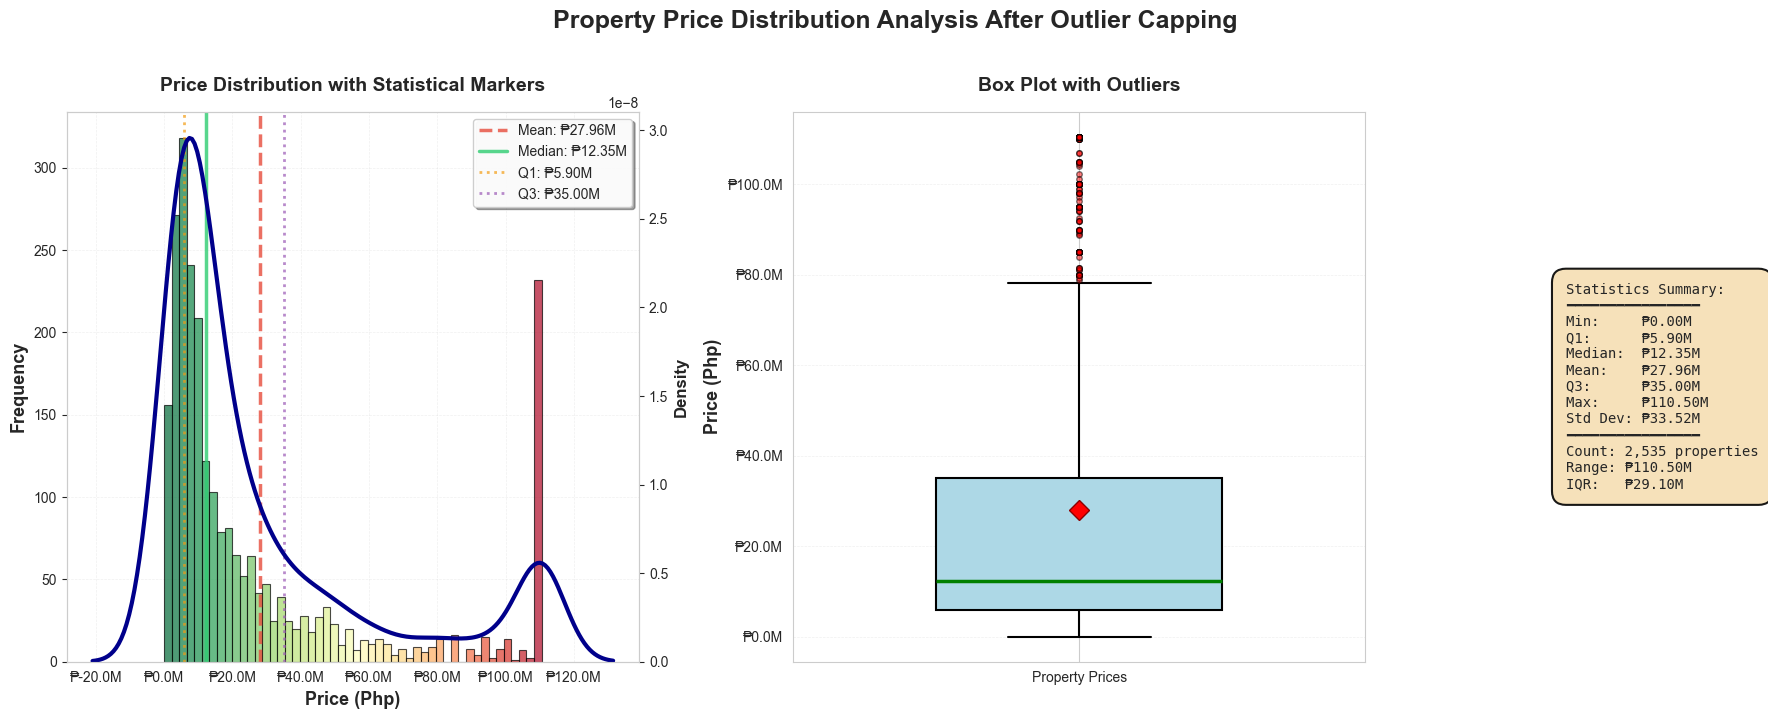

COMPREHENSIVE PRICE DISTRIBUTION ANALYSIS

📊 CENTRAL TENDENCY MEASURES:
   Mean Price:        ₱27,963,838.81 (₱27.96M)
   Median Price:      ₱12,354,000.00 (₱12.35M)
   Mode Price:        ₱110,503,536.64

📈 DISPERSION MEASURES:
   Standard Deviation: ₱33,523,681.70 (₱33.52M)
   Variance:          ₱1,123,837,234,948,816.50
   Range:             ₱110,503,535.64 (₱110.50M)
   IQR (Q3-Q1):       ₱29,100,000.00 (₱29.10M)

📦 QUARTILES:
   Minimum (0%):      ₱1.00
   Q1 (25%):          ₱5,900,000.00
   Q2/Median (50%):   ₱12,354,000.00
   Q3 (75%):          ₱35,000,000.00
   Maximum (100%):    ₱110,503,536.64

📉 DISTRIBUTION SHAPE:
   Skewness:          1.555 (Right-skewed - tail extends right)
   Kurtosis:          1.098 (Heavy-tailed - more outliers)

🎯 COEFFICIENT OF VARIATION:
   CV:                119.88% (High variability)

📊 DATASET INFORMATION:
   Total Properties:  2,535
   Mean/Median Ratio: 2.264 (Mean > Median: positive skew)


In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Set style for better aesthetics
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'sans-serif'

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Property Price Distribution Analysis After Outlier Capping', 
             fontsize=18, fontweight='bold', y=1.02)

# Calculate statistics
mean_price = cleaned_df['Price(Php)'].mean()
median_price = cleaned_df['Price(Php)'].median()
std_price = cleaned_df['Price(Php)'].std()
q1 = cleaned_df['Price(Php)'].quantile(0.25)
q3 = cleaned_df['Price(Php)'].quantile(0.75)
min_price = cleaned_df['Price(Php)'].min()
max_price = cleaned_df['Price(Php)'].max()

# ============ LEFT PLOT: Main Histogram with KDE ============
ax1 = axes[0]

# Create histogram with enhanced styling
n, bins, patches = ax1.hist(cleaned_df['Price(Php)'], 
                            bins=50, 
                            alpha=0.7, 
                            color='#3498db',
                            edgecolor='black',
                            linewidth=0.8,
                            density=False)

# Color bars by price range for visual interest
cm = plt.cm.RdYlGn_r
for i, patch in enumerate(patches):
    patch.set_facecolor(cm(i / len(patches)))

# Add KDE overlay on secondary axis
ax1_twin = ax1.twinx()
sns.kdeplot(data=cleaned_df['Price(Php)'], 
           color='darkblue', 
           linewidth=3, 
           ax=ax1_twin,
           label='Density Curve')
ax1_twin.set_ylabel('Density', fontsize=12, fontweight='bold')
ax1_twin.grid(False)

# Add statistical lines with enhanced styling
ax1.axvline(mean_price, color='#e74c3c', linestyle='--', linewidth=2.5, 
           label=f'Mean: ₱{mean_price/1e6:.2f}M', alpha=0.8)
ax1.axvline(median_price, color='#2ecc71', linestyle='-', linewidth=2.5, 
           label=f'Median: ₱{median_price/1e6:.2f}M', alpha=0.8)
ax1.axvline(q1, color='#f39c12', linestyle=':', linewidth=2, 
           label=f'Q1: ₱{q1/1e6:.2f}M', alpha=0.7)
ax1.axvline(q3, color='#9b59b6', linestyle=':', linewidth=2, 
           label=f'Q3: ₱{q3/1e6:.2f}M', alpha=0.7)

# Labels and formatting
ax1.set_xlabel('Price (Php)', fontsize=13, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=13, fontweight='bold')
ax1.set_title('Price Distribution with Statistical Markers', 
             fontsize=14, fontweight='bold', pad=15)

# Format x-axis as millions
ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'₱{x/1e6:.1f}M'))

# Enhanced legend
ax1.legend(loc='upper right', fontsize=10, frameon=True, shadow=True, 
          fancybox=True, framealpha=0.95)

# Add grid
ax1.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)

# ============ RIGHT PLOT: Box Plot with Statistics ============
ax2 = axes[1]

# Create box plot
bp = ax2.boxplot([cleaned_df['Price(Php)']], 
                 vert=True,
                 patch_artist=True,
                 widths=0.5,
                 showmeans=True,
                 meanprops=dict(marker='D', markerfacecolor='red', 
                              markersize=10, markeredgecolor='darkred'),
                 medianprops=dict(color='green', linewidth=2.5),
                 boxprops=dict(facecolor='lightblue', edgecolor='black', linewidth=1.5),
                 whiskerprops=dict(color='black', linewidth=1.5),
                 capprops=dict(color='black', linewidth=1.5),
                 flierprops=dict(marker='o', markerfacecolor='red', 
                               markersize=4, alpha=0.5))

# Format y-axis
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'₱{x/1e6:.1f}M'))
ax2.set_ylabel('Price (Php)', fontsize=13, fontweight='bold')
ax2.set_title('Box Plot with Outliers', fontsize=14, fontweight='bold', pad=15)
ax2.set_xticklabels(['Property Prices'])
ax2.grid(True, alpha=0.3, linestyle='--', linewidth=0.5, axis='y')

# Add statistics annotations on box plot
stats_text = f"""Statistics Summary:
━━━━━━━━━━━━━━━━
Min:     ₱{min_price/1e6:.2f}M
Q1:      ₱{q1/1e6:.2f}M
Median:  ₱{median_price/1e6:.2f}M
Mean:    ₱{mean_price/1e6:.2f}M
Q3:      ₱{q3/1e6:.2f}M
Max:     ₱{max_price/1e6:.2f}M
Std Dev: ₱{std_price/1e6:.2f}M
━━━━━━━━━━━━━━━━
Count: {len(cleaned_df):,} properties
Range: ₱{(max_price-min_price)/1e6:.2f}M
IQR:   ₱{(q3-q1)/1e6:.2f}M"""

ax2.text(1.35, 0.5, stats_text,
        transform=ax2.transAxes,
        fontsize=10,
        verticalalignment='center',
        bbox=dict(boxstyle='round,pad=1', facecolor='wheat', 
                 alpha=0.9, edgecolor='black', linewidth=1.5),
        family='monospace')

plt.tight_layout()
plt.show()

# ============ PRINT DETAILED STATISTICS ============
print("=" * 80)
print("COMPREHENSIVE PRICE DISTRIBUTION ANALYSIS")
print("=" * 80)
print(f"\n📊 CENTRAL TENDENCY MEASURES:")
print(f"   Mean Price:        ₱{mean_price:,.2f} (₱{mean_price/1e6:.2f}M)")
print(f"   Median Price:      ₱{median_price:,.2f} (₱{median_price/1e6:.2f}M)")
print(f"   Mode Price:        ₱{cleaned_df['Price(Php)'].mode().values[0]:,.2f}")

print(f"\n📈 DISPERSION MEASURES:")
print(f"   Standard Deviation: ₱{std_price:,.2f} (₱{std_price/1e6:.2f}M)")
print(f"   Variance:          ₱{cleaned_df['Price(Php)'].var():,.2f}")
print(f"   Range:             ₱{max_price - min_price:,.2f} (₱{(max_price-min_price)/1e6:.2f}M)")
print(f"   IQR (Q3-Q1):       ₱{q3 - q1:,.2f} (₱{(q3-q1)/1e6:.2f}M)")

print(f"\n📦 QUARTILES:")
print(f"   Minimum (0%):      ₱{min_price:,.2f}")
print(f"   Q1 (25%):          ₱{q1:,.2f}")
print(f"   Q2/Median (50%):   ₱{median_price:,.2f}")
print(f"   Q3 (75%):          ₱{q3:,.2f}")
print(f"   Maximum (100%):    ₱{max_price:,.2f}")

print(f"\n📉 DISTRIBUTION SHAPE:")
skewness = cleaned_df['Price(Php)'].skew()
kurtosis = cleaned_df['Price(Php)'].kurtosis()
print(f"   Skewness:          {skewness:.3f}", end="")
if skewness > 0:
    print(" (Right-skewed - tail extends right)")
elif skewness < 0:
    print(" (Left-skewed - tail extends left)")
else:
    print(" (Symmetric)")
    
print(f"   Kurtosis:          {kurtosis:.3f}", end="")
if kurtosis > 0:
    print(" (Heavy-tailed - more outliers)")
elif kurtosis < 0:
    print(" (Light-tailed - fewer outliers)")
else:
    print(" (Normal distribution)")

print(f"\n🎯 COEFFICIENT OF VARIATION:")
cv = (std_price / mean_price) * 100
print(f"   CV:                {cv:.2f}%", end="")
if cv < 15:
    print(" (Low variability)")
elif cv < 30:
    print(" (Moderate variability)")
else:
    print(" (High variability)")

print(f"\n📊 DATASET INFORMATION:")
print(f"   Total Properties:  {len(cleaned_df):,}")
print(f"   Mean/Median Ratio: {mean_price/median_price:.3f}", end="")
if mean_price > median_price * 1.1:
    print(" (Mean > Median: positive skew)")
elif mean_price < median_price * 0.9:
    print(" (Mean < Median: negative skew)")
else:
    print(" (Mean ≈ Median: relatively symmetric)")

print("=" * 80)

#### Summary
- The price distribution is now bounded, peaking dramatically at the low end and trailing off smoothly toward a clear maximum limit (approximately ₱110.5 Million), which is the calculated capping threshold. 
- This confirms that the extreme outliers (like the original ₱8.27 Billion property) were effectively Winsorized. This stabilization is crucial for regression modeling, as it ensures that the model's cost function (like MSE) is not dominated by a few rare, extreme values, making the final model more robust and generalizable across the majority of the data.


### 4.2 Average Price by Property Category

In [ ]:
category_cols = ['Category_Commercial', 'Category_Condominium', 'Category_House', 'Category_Land', 'Category_Apartment']

avg_price_by_category = {}
for col in category_cols:
    avg_price_by_category[col.replace('Category_', '')] = df.loc[df[col] == 1, 'Price(Php)'].mean()

import pandas as pd
pd.DataFrame(avg_price_by_category.items(), columns=['Category', 'Average Price (Php)'])


,Category,Average Price (Php)
0,Commercial,8.192796e+07
1,Condominium,2.367100e+07
2,House,3.132873e+07
3,Land,3.457743e+07
4,Apartment,4.939958e+07


The table below shows the average property price per category.

| Category | Average Price (Php) |
|-----------|---------------------|
| Commercial | ₱81,927,960 |
| Condominium | ₱23,671,000 |
| House | ₱31,382,000 |
| Land | ₱34,577,000 |
| Apartment | ₱49,399,580 |

**Interpretation:**
- **Commercial** properties have the highest average price due to their business-oriented nature and prime locations.
- **Condominium** units are the most affordable, reflecting smaller unit sizes and shared amenities.
- **Houses** and **land** lots are moderately priced, influenced by size, neighborhood, and development potential.
- This suggests that property type is a **key predictor** of price variation in the real estate market.


### 4.3 Correlation Heatmap


C:\Users\63920\AppData\Local\Temp\ipykernel_14064\4042298937.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


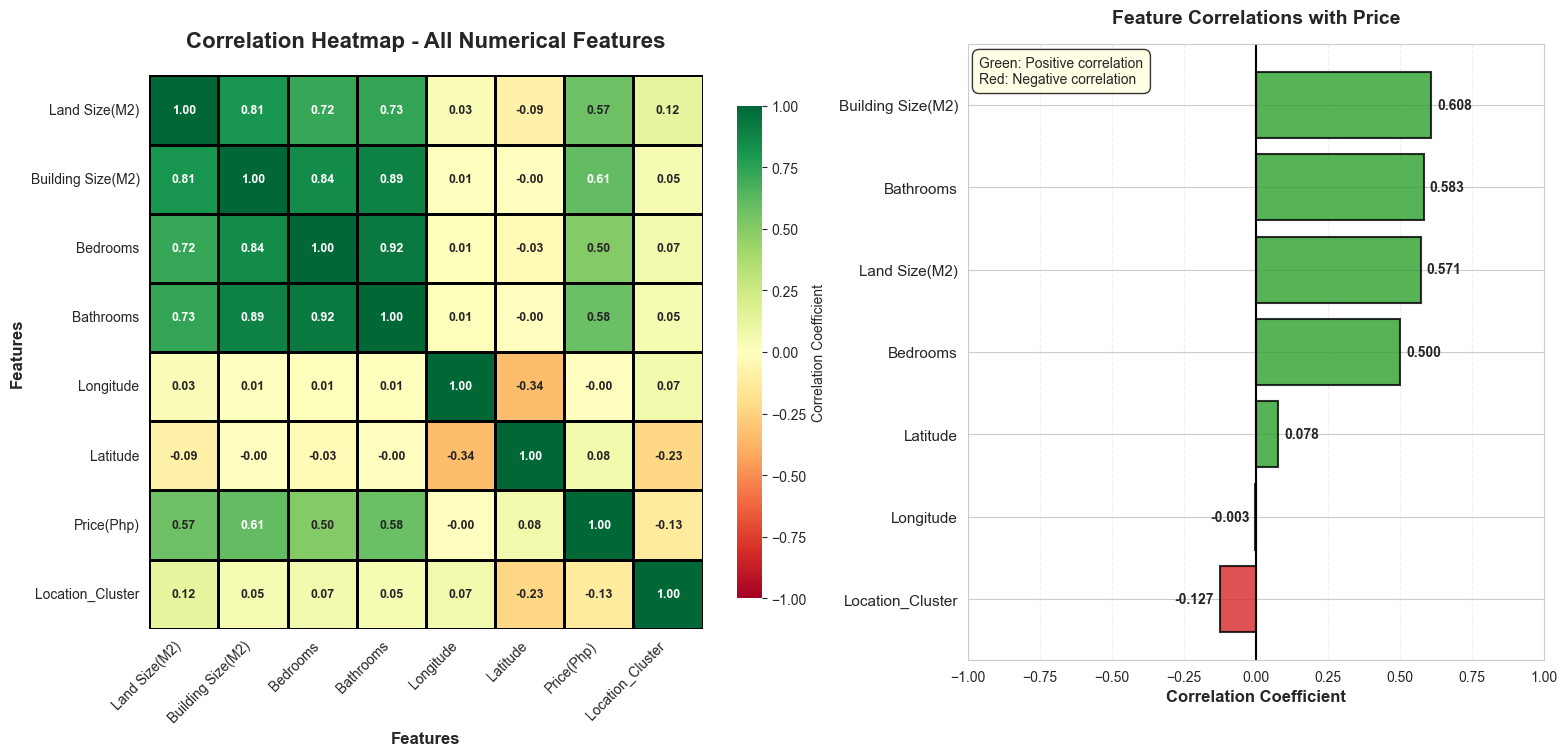

CORRELATION ANALYSIS REPORT

📊 CORRELATIONS WITH PRICE (Ranked by Strength):
------------------------------------------------------------------------------------------
💪 Building Size(M2)        : +0.6081  [Strong       Positive]
💪 Bathrooms                : +0.5828  [Strong       Positive]
💪 Land Size(M2)            : +0.5710  [Strong       Positive]
💪 Bedrooms                 : +0.5002  [Strong       Positive]
⚪ Latitude                 : +0.0776  [Very Weak    Positive]
⚪ Longitude                : -0.0030  [Very Weak    Negative]
📉 Location_Cluster         : -0.1268  [Weak         Negative]

INTERPRETATION GUIDE:
Correlation Strength:
  • 0.70 to 1.00 (or -0.70 to -1.00)  → Very Strong relationship
  • 0.50 to 0.69 (or -0.50 to -0.69)  → Strong relationship
  • 0.30 to 0.49 (or -0.30 to -0.49)  → Moderate relationship
  • 0.10 to 0.29 (or -0.10 to -0.29)  → Weak relationship
  • 0.00 to 0.09 (or -0.00 to -0.09)  → Very Weak/No relationship

Direction:
  • Positive: Variables increa

In [ ]:
# correlation analysis
numerical_cols = cleaned_df.select_dtypes(include=[np.number]).columns.tolist()

# Calculate correlation matrix
correlation_matrix = cleaned_df[numerical_cols].corr()

# Create figure with two subplots
fig = plt.figure(figsize=(18, 8))
gs = fig.add_gridspec(1, 2, width_ratios=[1.2, 1], hspace=0.3)

# ============ LEFT PLOT: Full Correlation Heatmap ============
ax1 = fig.add_subplot(gs[0])

# Create mask for upper triangle (optional - shows only lower triangle)
# mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create heatmap with enhanced styling
sns.heatmap(correlation_matrix,
            annot=True,  # Show correlation values
            fmt='.2f',   # Format to 2 decimal places
            cmap='RdYlGn',  # Red-Yellow-Green colormap
            center=0,    # Center colormap at 0
            square=True, # Make cells square
            linewidths=1,  # Add lines between cells
            linecolor='black',
            cbar_kws={'label': 'Correlation Coefficient', 'shrink': 0.8},
            vmin=-1, vmax=1,  # Set color scale limits
            ax=ax1,
            annot_kws={'size': 9, 'weight': 'bold'})

# Customize the plot
ax1.set_title('Correlation Heatmap - All Numerical Features', 
             fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Features', fontsize=12, fontweight='bold')
ax1.set_ylabel('Features', fontsize=12, fontweight='bold')

# Rotate labels for better readability
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=10)
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0, fontsize=10)

# ============ RIGHT PLOT: Price Correlations Bar Chart ============
ax2 = fig.add_subplot(gs[1])

# Get correlations with Price
if 'Price(Php)' in correlation_matrix.columns:
    price_corr = correlation_matrix['Price(Php)'].drop('Price(Php)').sort_values(ascending=True)
    
    # Create horizontal bar chart
    colors = ['#d62728' if x < 0 else '#2ca02c' for x in price_corr.values]
    bars = ax2.barh(range(len(price_corr)), price_corr.values, color=colors, 
                    edgecolor='black', linewidth=1.5, alpha=0.8)
    
    # Add value labels on bars
    for i, (bar, val) in enumerate(zip(bars, price_corr.values)):
        x_pos = val + (0.02 if val > 0 else -0.02)
        ha = 'left' if val > 0 else 'right'
        ax2.text(x_pos, i, f'{val:.3f}', 
                va='center', ha=ha, fontsize=10, fontweight='bold')
    
    # Customize the plot
    ax2.set_yticks(range(len(price_corr)))
    ax2.set_yticklabels(price_corr.index, fontsize=11)
    ax2.set_xlabel('Correlation Coefficient', fontsize=12, fontweight='bold')
    ax2.set_title('Feature Correlations with Price', 
                 fontsize=14, fontweight='bold', pad=15)
    ax2.axvline(x=0, color='black', linestyle='-', linewidth=1.5)
    ax2.grid(True, alpha=0.3, linestyle='--', axis='x')
    ax2.set_xlim(-1, 1)
    
    # Add interpretation legend
    legend_text = "Green: Positive correlation\nRed: Negative correlation"
    ax2.text(0.02, 0.98, legend_text,
            transform=ax2.transAxes,
            fontsize=10,
            verticalalignment='top',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightyellow', 
                     alpha=0.8, edgecolor='black'))

plt.tight_layout()
plt.show()

# ============ PRINT DETAILED CORRELATION ANALYSIS ============
print("=" * 90)
print("CORRELATION ANALYSIS REPORT")
print("=" * 90)

if 'Price(Php)' in correlation_matrix.columns:
    price_correlations = correlation_matrix['Price(Php)'].drop('Price(Php)').sort_values(ascending=False)
    
    print("\n📊 CORRELATIONS WITH PRICE (Ranked by Strength):")
    print("-" * 90)
    for feature, corr_value in price_correlations.items():
        # Determine strength
        abs_corr = abs(corr_value)
        if abs_corr >= 0.7:
            strength = "Very Strong"
            emoji = "🔥"
        elif abs_corr >= 0.5:
            strength = "Strong"
            emoji = "💪"
        elif abs_corr >= 0.3:
            strength = "Moderate"
            emoji = "📈"
        elif abs_corr >= 0.1:
            strength = "Weak"
            emoji = "📉"
        else:
            strength = "Very Weak"
            emoji = "⚪"
        
        # Determine direction
        direction = "Positive" if corr_value > 0 else "Negative"
        
        print(f"{emoji} {feature:25s}: {corr_value:+.4f}  [{strength:12s} {direction:8s}]")

print("\n" + "=" * 90)
print("INTERPRETATION GUIDE:")
print("=" * 90)
print("Correlation Strength:")
print("  • 0.70 to 1.00 (or -0.70 to -1.00)  → Very Strong relationship")
print("  • 0.50 to 0.69 (or -0.50 to -0.69)  → Strong relationship")
print("  • 0.30 to 0.49 (or -0.30 to -0.49)  → Moderate relationship")
print("  • 0.10 to 0.29 (or -0.10 to -0.29)  → Weak relationship")
print("  • 0.00 to 0.09 (or -0.00 to -0.09)  → Very Weak/No relationship")
print("\nDirection:")
print("  • Positive: Variables increase together")
print("  • Negative: One increases while the other decreases")
print("=" * 90)

# Find and display strongest correlations overall
print("\n🔍 STRONGEST CORRELATIONS (excluding self-correlations):")
print("-" * 90)

# Get upper triangle of correlation matrix
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

# Stack and sort by absolute value
correlations_stacked = upper_triangle.stack().sort_values(key=abs, ascending=False)

# Display top 10 strongest correlations
for idx, (pair, value) in enumerate(correlations_stacked.head(10).items(), 1):
    direction = "↗️" if value > 0 else "↘️"
    print(f"{idx:2d}. {pair[0]:20s} ↔️ {pair[1]:20s}: {value:+.4f} {direction}")

print("=" * 90)

# Statistical summary
print("\n📈 CORRELATION MATRIX STATISTICS:")
print("-" * 90)
all_correlations = upper_triangle.stack()
print(f"Total correlation pairs:     {len(all_correlations)}")
print(f"Mean correlation:            {all_correlations.mean():+.4f}")
print(f"Median correlation:          {all_correlations.median():+.4f}")
print(f"Std deviation:               {all_correlations.std():.4f}")
print(f"Max correlation:             {all_correlations.max():+.4f}")
print(f"Min correlation:             {all_correlations.min():+.4f}")
print(f"Strong correlations (|r|≥0.5): {(abs(all_correlations) >= 0.5).sum()}")
print("=" * 90)

Correlation Heatmap
Relationship Between Size and Price
Geographic Distribution
Bedrooms/Bathrooms vs Price

## 5. Feature Engineering

After the data cleaning and basic preprocessing, we'll create additional features to capture important relationships in the real estate data:

1. Price-related features
2. Area-based features
3. Room-related features
4. Location-based features
5. Feature scaling and transformations

These engineered features will help improve the model's ability to capture complex patterns in real estate pricing.

In [143]:
# 1. Price-related features
# Create price per unit area
df['Price_per_Land_M2'] = df['Price(Php)'] / df['Land Size(M2)']
df['Price_per_Building_M2'] = df['Price(Php)'] / df['Building Size(M2)']

# Log transform price features to handle skewness
df['Log_Price'] = np.log1p(df['Price(Php)'])
df['Log_Price_per_Land'] = np.log1p(df['Price_per_Land_M2'])
df['Log_Price_per_Building'] = np.log1p(df['Price_per_Building_M2'])

# 2. Area-based features
df['Building_to_Land_Ratio'] = df['Building Size(M2)'] / df['Land Size(M2)']
df['Total_Area'] = df['Land Size(M2)'] + df['Building Size(M2)']
df['Log_Land_Size'] = np.log1p(df['Land Size(M2)'])
df['Log_Building_Size'] = np.log1p(df['Building Size(M2)'])

# 3. Room-related features
df['Total_Rooms'] = df['Bedrooms'] + df['Bathrooms']
df['Bath_per_Bed_Ratio'] = df['Bathrooms'] / df['Bedrooms']
df['Area_per_Room'] = df['Building Size(M2)'] / df['Total_Rooms']

# Handle infinite values from divisions
def replace_inf_with_median(df, column):
    median_value = df[column].replace([np.inf, -np.inf], np.nan).median()
    df[column] = df[column].replace([np.inf, -np.inf], median_value)
    return df

# Replace infinite values with medians
for col in ['Price_per_Land_M2', 'Price_per_Building_M2', 
            'Building_to_Land_Ratio', 'Bath_per_Bed_Ratio', 
            'Area_per_Room']:
    df = replace_inf_with_median(df, col)

# Show summary of new features
print("\nNew features summary:")
new_features = ['Price_per_Land_M2', 'Price_per_Building_M2', 'Building_to_Land_Ratio',
                'Total_Area', 'Total_Rooms', 'Bath_per_Bed_Ratio', 'Area_per_Room']
print(df[new_features].describe().round(2))


New features summary:
       Price_per_Land_M2  Price_per_Building_M2  Building_to_Land_Ratio  \
count       3.000000e+03           3.000000e+03            3.000000e+03   
mean        1.028893e+19           3.205871e+19            5.238601e+13   
std         1.088385e+20           3.352426e+20            5.842240e+14   
min         0.000000e+00           0.000000e+00            0.000000e+00   
25%         5.033391e+04           5.441282e+04            6.600000e-01   
50%         9.091200e+04           1.085165e+05            1.020000e+00   
75%         1.890756e+05           1.666667e+05            1.480000e+00   
max         1.943999e+21           3.887998e+21            1.293026e+16   

       Total_Area  Total_Rooms  Bath_per_Bed_Ratio  Area_per_Room  
count     3000.00      3000.00             2996.00        3000.00  
mean       619.19         7.24                0.96          35.04  
std        578.82         3.87                0.25          22.04  
min          0.00         0.0

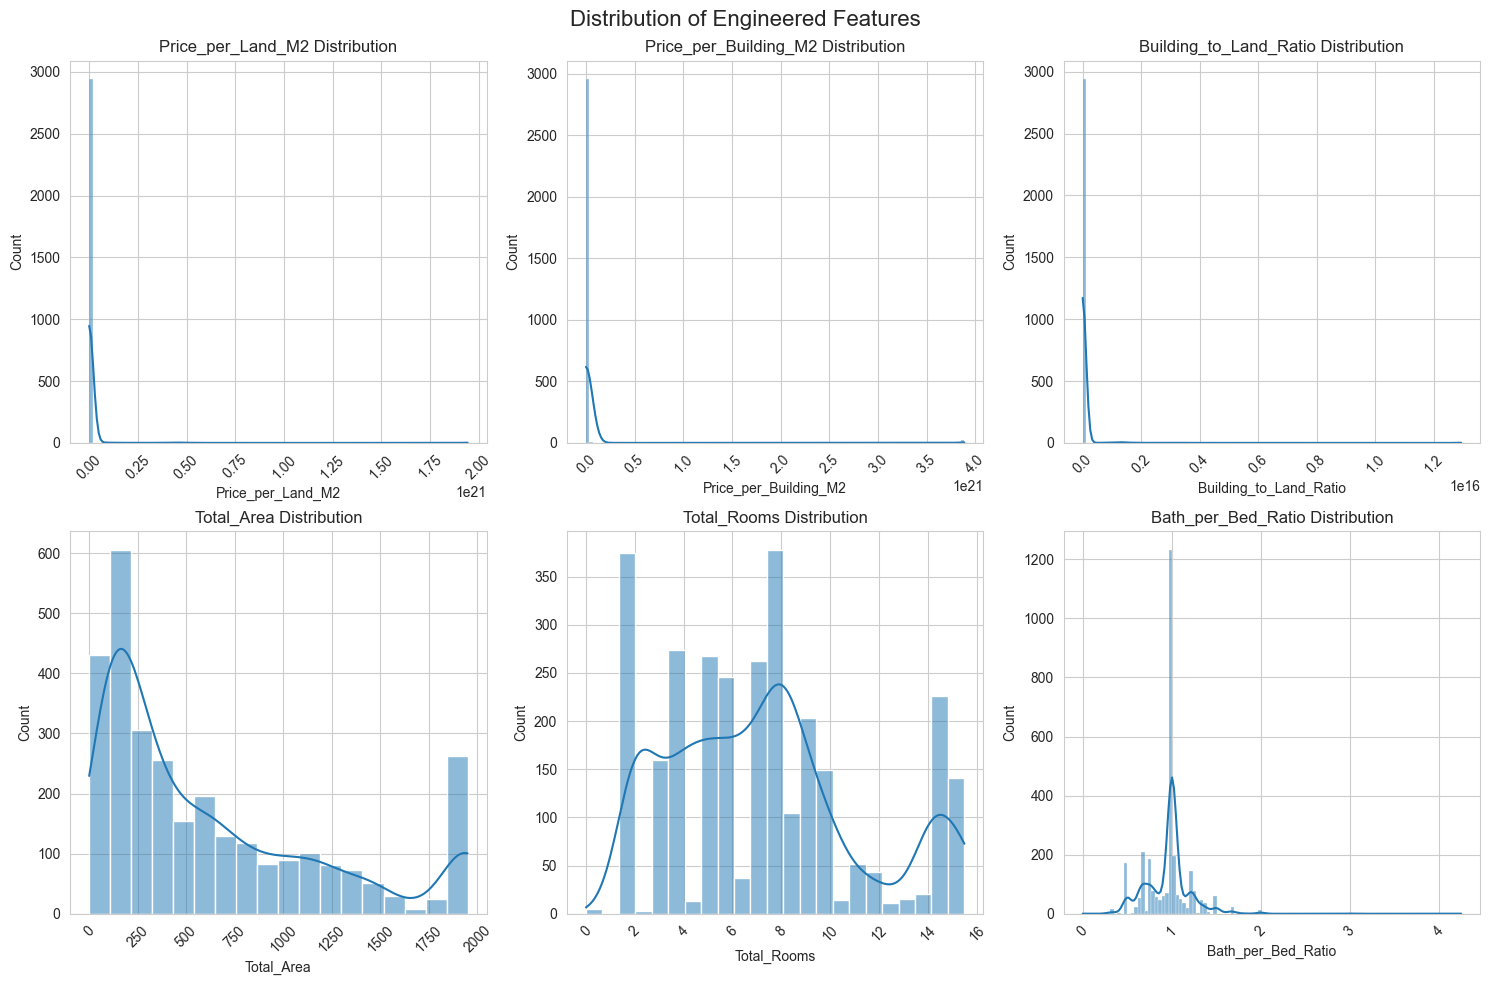

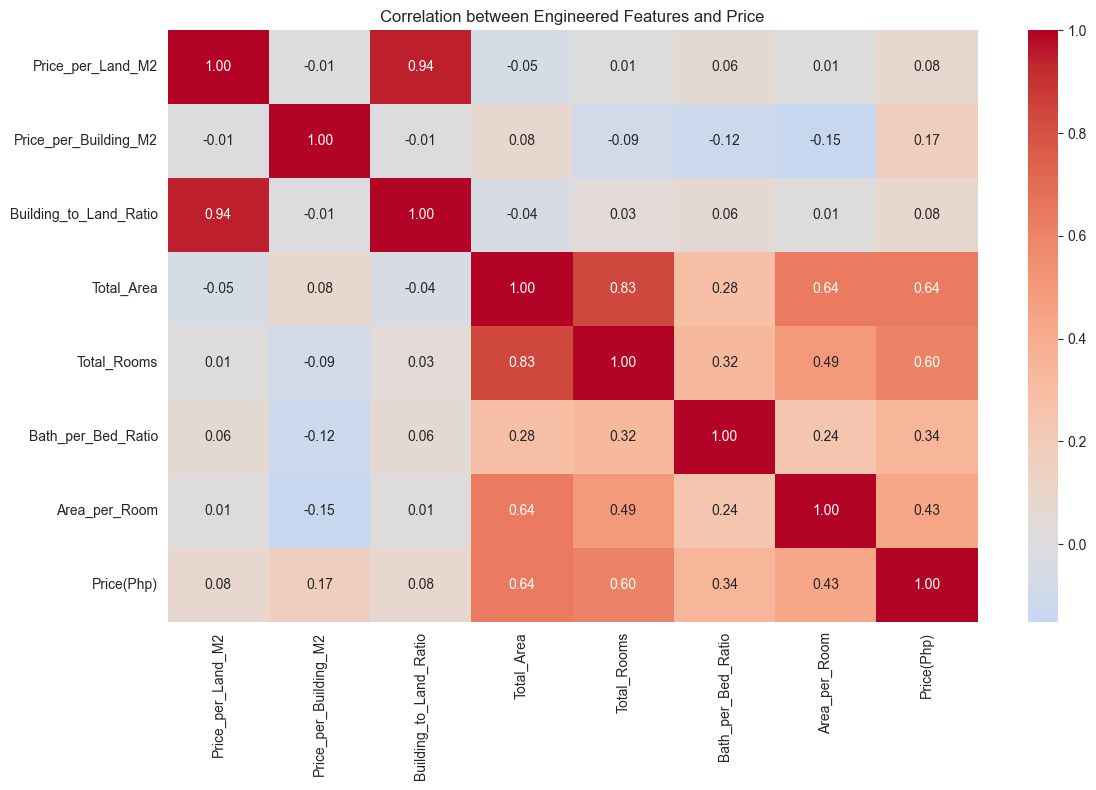


Correlations with Price(Php):
Price(Php)                1.000000
Total_Area                0.635114
Total_Rooms               0.601763
Area_per_Room             0.432464
Bath_per_Bed_Ratio        0.343369
Price_per_Building_M2     0.171936
Price_per_Land_M2         0.082343
Building_to_Land_Ratio    0.077496
Name: Price(Php), dtype: float64


In [144]:
# Visualize distributions of new features
plt.figure(figsize=(15, 10))
plt.suptitle('Distribution of Engineered Features', fontsize=16)

for idx, feature in enumerate(new_features[:6], 1):  # Plot first 6 features
    plt.subplot(2, 3, idx)
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Create correlation matrix with price
features_with_price = new_features + ['Price(Php)']
correlation_matrix = df[features_with_price].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, 
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f')
plt.title('Correlation between Engineered Features and Price')
plt.tight_layout()
plt.show()

# Print correlations with price in descending order
price_correlations = correlation_matrix['Price(Php)'].sort_values(ascending=False)
print("\nCorrelations with Price(Php):")
print(price_correlations)

### Feature Engineering Summary

The following features were created to enhance the model's ability to capture complex patterns in real estate pricing:

1. **Price-related Features**
   - `Price_per_Land_M2`: Price per square meter of land
   - `Price_per_Building_M2`: Price per square meter of building
   - Log transformations of price features to handle skewness

2. **Area-based Features**
   - `Building_to_Land_Ratio`: Ratio of building size to land size
   - `Total_Area`: Combined area of land and building
   - Log transformations of size features

3. **Room-related Features**
   - `Total_Rooms`: Sum of bedrooms and bathrooms
   - `Bath_per_Bed_Ratio`: Ratio of bathrooms to bedrooms
   - `Area_per_Room`: Building area per room

These engineered features will be used alongside our original features for model training. The correlation analysis shows which features have the strongest relationships with property prices, which will help in feature selection and model interpretation.

### Feature Engineering Visualizations

Let's visualize our engineered features to understand:
1. The distribution of each engineered feature
2. Relationships between features and price
3. Feature importance analysis
4. Correlation heatmap of all features
5. Pair plots of the most important features

<Figure size 1500x1000 with 0 Axes>

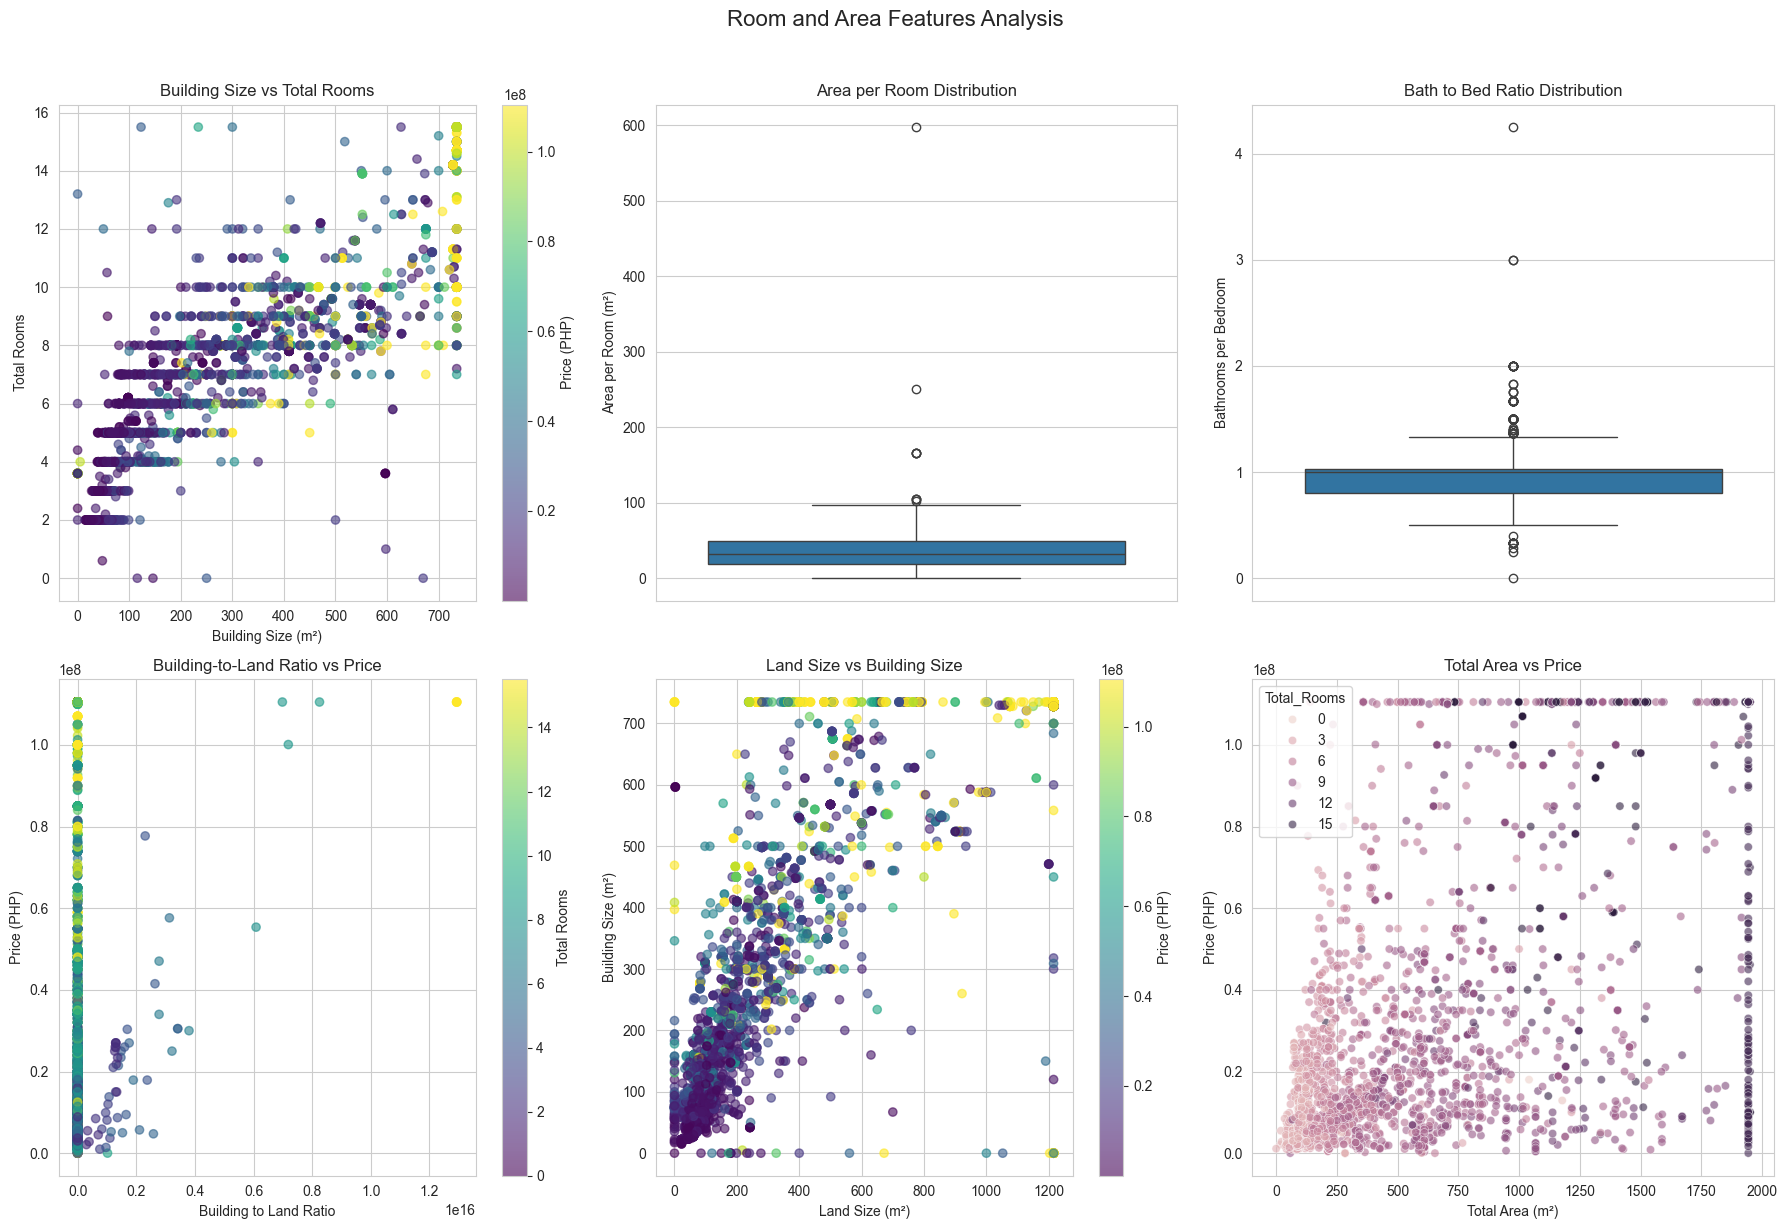

In [148]:
# 2. Room and Area Features Relationships
plt.figure(figsize=(15, 10))

# Create a 2x3 subplot grid
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Room and Area Features Analysis', fontsize=16, y=1.02)

# Building Size vs Total Rooms with price color mapping
scatter1 = axes[0,0].scatter(df['Building Size(M2)'], df['Total_Rooms'], 
                           c=df['Price(Php)'], cmap='viridis', alpha=0.6)
axes[0,0].set_title('Building Size vs Total Rooms')
axes[0,0].set_xlabel('Building Size (m²)')
axes[0,0].set_ylabel('Total Rooms')
plt.colorbar(scatter1, ax=axes[0,0], label='Price (PHP)')

# Area per Room distribution
sns.boxplot(data=df, y='Area_per_Room', ax=axes[0,1])
axes[0,1].set_title('Area per Room Distribution')
axes[0,1].set_ylabel('Area per Room (m²)')

# Bath to Bed Ratio distribution
sns.boxplot(data=df, y='Bath_per_Bed_Ratio', ax=axes[0,2])
axes[0,2].set_title('Bath to Bed Ratio Distribution')
axes[0,2].set_ylabel('Bathrooms per Bedroom')

# Building to Land Ratio vs Price
scatter2 = axes[1,0].scatter(df['Building_to_Land_Ratio'], df['Price(Php)'],
                           c=df['Total_Rooms'], cmap='viridis', alpha=0.6)
axes[1,0].set_title('Building-to-Land Ratio vs Price')
axes[1,0].set_xlabel('Building to Land Ratio')
axes[1,0].set_ylabel('Price (PHP)')
plt.colorbar(scatter2, ax=axes[1,0], label='Total Rooms')

# Land Size vs Building Size with price mapping
scatter3 = axes[1,1].scatter(df['Land Size(M2)'], df['Building Size(M2)'],
                           c=df['Price(Php)'], cmap='viridis', alpha=0.6)
axes[1,1].set_title('Land Size vs Building Size')
axes[1,1].set_xlabel('Land Size (m²)')
axes[1,1].set_ylabel('Building Size (m²)')
plt.colorbar(scatter3, ax=axes[1,1], label='Price (PHP)')

# Total Area vs Price
sns.scatterplot(data=df, x='Total_Area', y='Price(Php)', 
                hue='Total_Rooms', ax=axes[1,2], alpha=0.6)
axes[1,2].set_title('Total Area vs Price')
axes[1,2].set_xlabel('Total Area (m²)')
axes[1,2].set_ylabel('Price (PHP)')

plt.tight_layout()
plt.show()

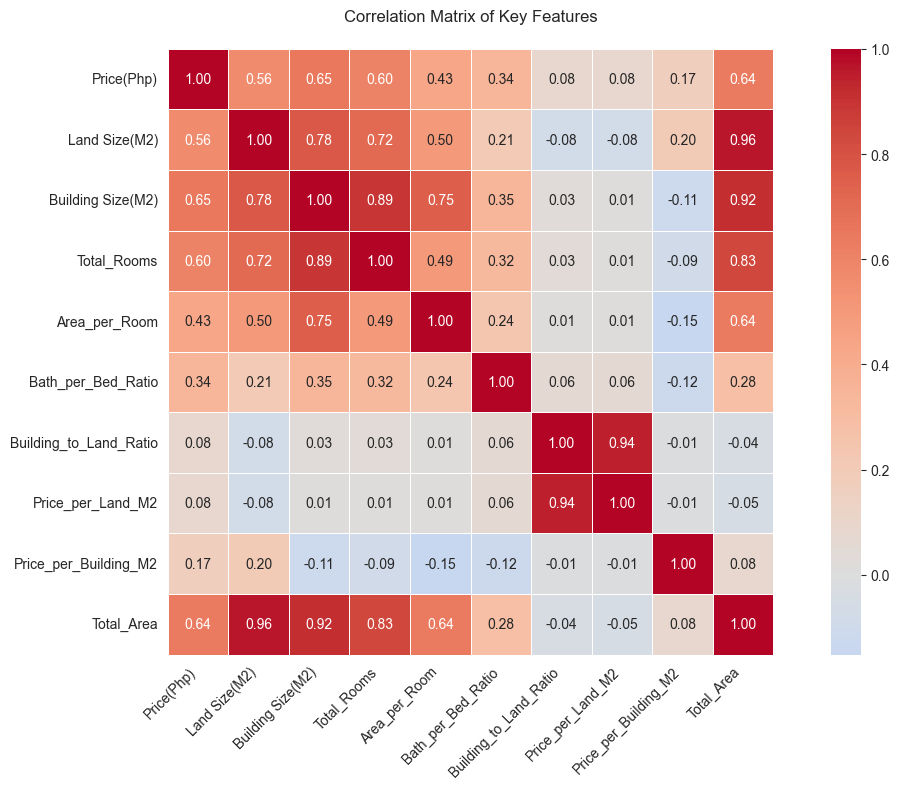


Top Feature Correlations with Price:
Price(Php)                1.000000
Building Size(M2)         0.650027
Total_Area                0.635114
Total_Rooms               0.601763
Land Size(M2)             0.564669
Area_per_Room             0.432464
Bath_per_Bed_Ratio        0.343369
Price_per_Building_M2     0.171936
Price_per_Land_M2         0.082343
Building_to_Land_Ratio    0.077496
Name: Price(Php), dtype: float64


In [150]:
# 3. Correlation Analysis
plt.figure(figsize=(12, 8))

# Select relevant features for correlation analysis
features_for_corr = ['Price(Php)', 'Land Size(M2)', 'Building Size(M2)', 
                     'Total_Rooms', 'Area_per_Room', 'Bath_per_Bed_Ratio',
                     'Building_to_Land_Ratio', 'Price_per_Land_M2', 
                     'Price_per_Building_M2', 'Total_Area']

# Create correlation matrix
corr_matrix = df[features_for_corr].corr()

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f',
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Key Features', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Print top correlations with price
price_corr = corr_matrix['Price(Php)'].sort_values(ascending=False)
print("\nTop Feature Correlations with Price:")
print(price_corr)

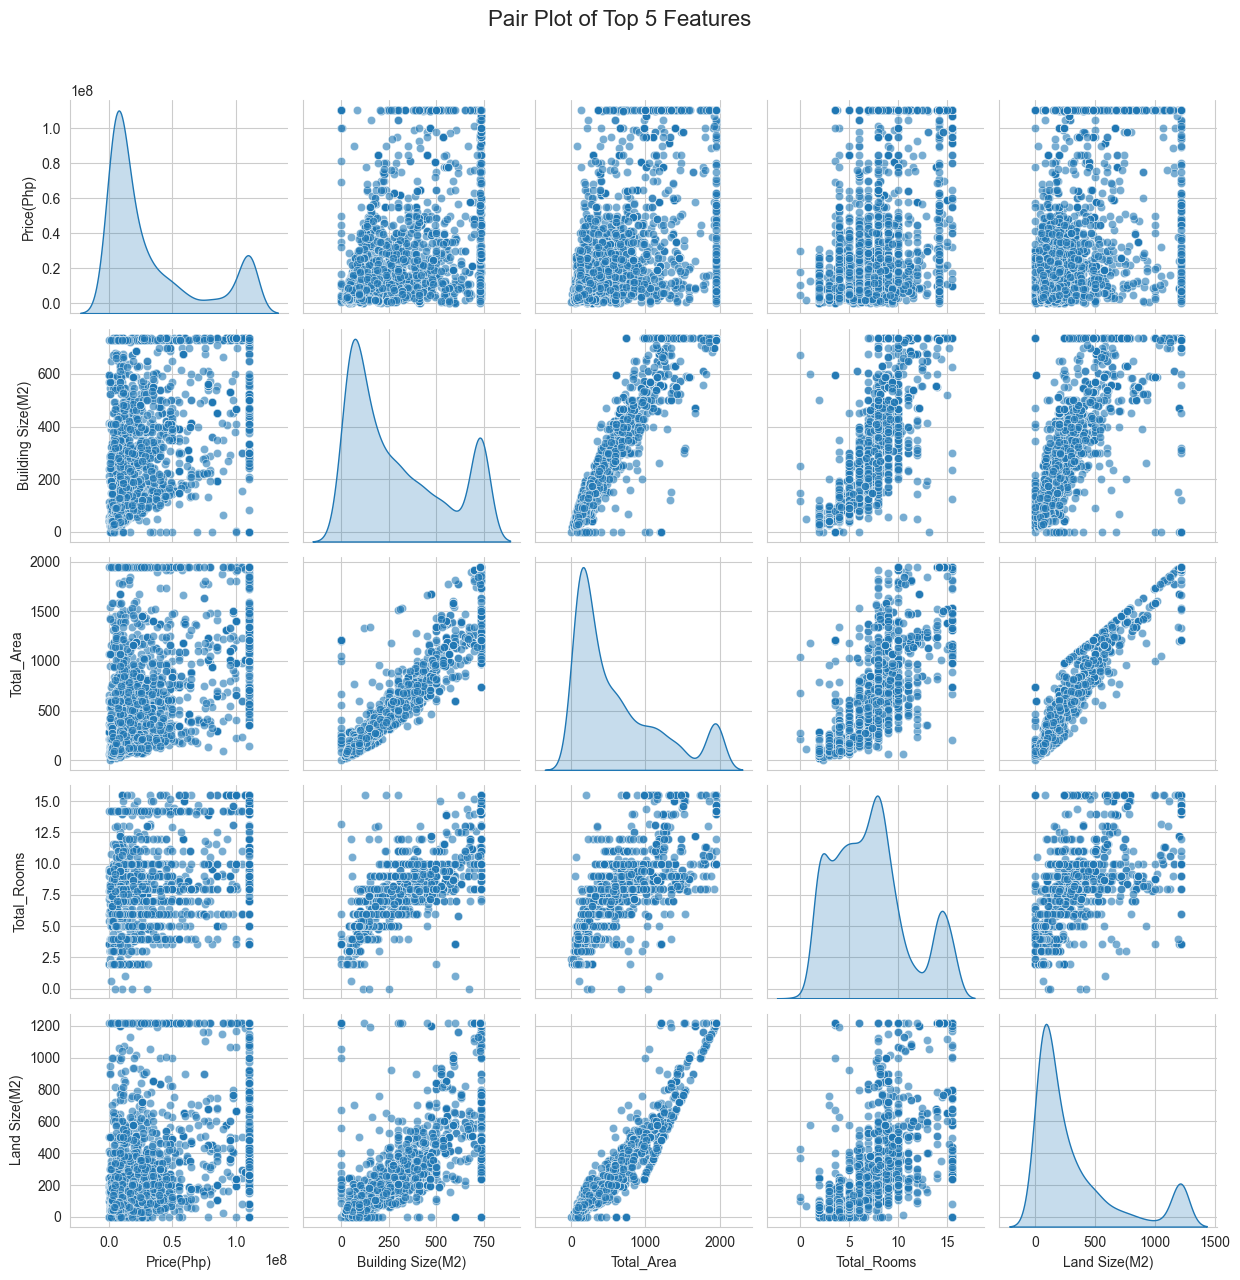

In [151]:
# 4. Pair Plot of Most Important Features
# Select top 5 features most correlated with price
top_features = price_corr.head(5).index.tolist()

# Create pair plot
sns.pairplot(df[top_features], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot of Top 5 Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

### Visualization Insights

1. **Price Distribution Analysis**
   - Original price distribution shows right skewness
   - Log transformation helps normalize the price distribution
   - Price per square meter varies significantly between land and building area

2. **Room and Area Relationships**
   - Building size shows positive correlation with total rooms
   - Area per room distribution reveals typical space allocation
   - Building-to-land ratio helps identify property development density

3. **Correlation Analysis**
   - Identified strongest predictors of price
   - Revealed multicollinearity between certain features
   - Highlighted which engineered features add most value

4. **Feature Interactions**
   - Pair plots show complex relationships between top features
   - Some features show non-linear relationships with price
   - Identified potential interaction effects to consider in modeling

These visualizations help validate our feature engineering choices and will guide feature selection for modeling.

## 6. Train-Test Analysis

This section prepares our data for modeling by:
1. Separating features (X) and target variable (y)
2. Creating a train-test split (80-20) with stratification
3. Setting up cross-validation for model evaluation
4. Scaling features appropriately

The goal is to ensure our model evaluation will be robust and unbiased, while preventing data leakage.

In [152]:
# Import required libraries for data splitting and preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

# 1. Prepare feature matrix X and target vector y
# Exclude the target variable and any redundant features
exclude_cols = ['Price(Php)', 'Log_Price', 'Price_per_Land_M2', 'Price_per_Building_M2']
X = df.drop(columns=exclude_cols)
y = df['Price(Php)']

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

# Display feature names
print("\nFeatures to be used:")
for i, feature in enumerate(X.columns, 1):
    print(f"{i}. {feature}")

# 2. Create train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("\nTrain-Test Split:")
print(f"Training set size: {X_train.shape[0]} samples ({X_train.shape[0]/X.shape[0]*100:.1f}%)")
print(f"Test set size: {X_test.shape[0]} samples ({X_test.shape[0]/X.shape[0]*100:.1f}%)")

# 3. Set up K-Fold Cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# 4. Create preprocessing pipeline
preprocessor = Pipeline([
    ('scaler', StandardScaler())
])

Feature matrix shape: (3000, 48)
Target vector shape: (3000,)

Features to be used:
1. Land Size(M2)
2. Building Size(M2)
3. Bedrooms
4. Bathrooms
5. Longitude
6. Latitude
7. Category_Apartment
8. Category_Commercial
9. Category_Condominium
10. Category_House
11. Category_Land
12. Sub-Category_Apartment,apartments
13. Sub-Category_Apartment,loft
14. Sub-Category_Apartment,room-1
15. Sub-Category_Commercial,building
16. Sub-Category_Commercial,coworking
17. Sub-Category_Commercial,offices
18. Sub-Category_Commercial,retail
19. Sub-Category_Commercial,serviced-office
20. Sub-Category_Commercial,warehouse
21. Sub-Category_Condominium,3-bedroom
22. Sub-Category_Condominium,4-bedroom
23. Sub-Category_Condominium,dormitory
24. Sub-Category_Condominium,double-bedroom
25. Sub-Category_Condominium,loft-1
26. Sub-Category_Condominium,other-4
27. Sub-Category_Condominium,penthouse-1
28. Sub-Category_Condominium,single-bedroom
29. Sub-Category_Condominium,studio
30. Sub-Category_House,beach-house


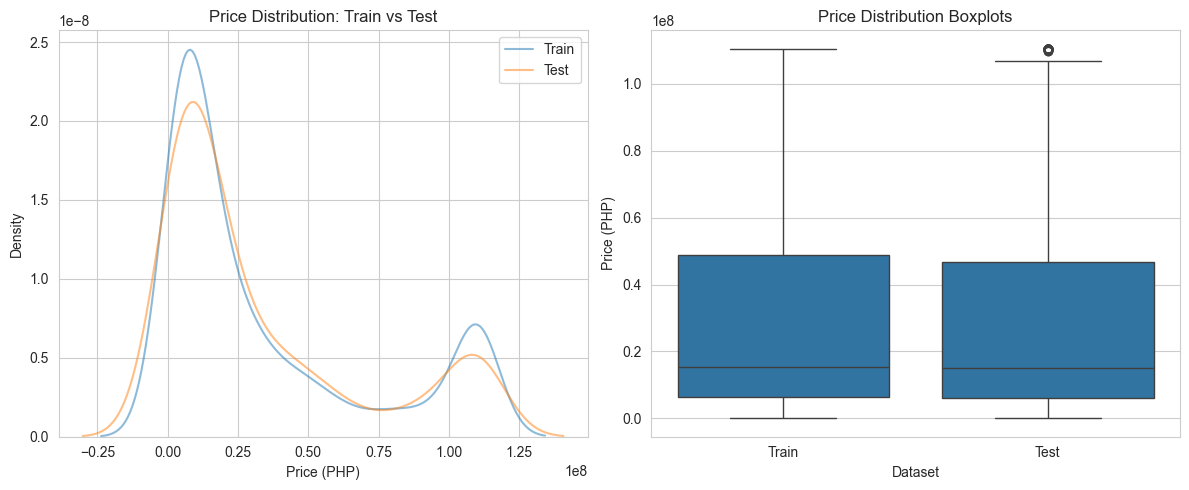


Price Statistics (Train Set):
count    2.400000e+03
mean     3.381300e+07
std      3.748508e+07
min      1.000000e+00
25%      6.337792e+06
50%      1.548000e+07
75%      4.880000e+07
max      1.105035e+08
Name: Price(Php), dtype: float64

Price Statistics (Test Set):
count    6.000000e+02
mean     3.265211e+07
std      3.626078e+07
min      1.000000e+00
25%      6.200000e+06
50%      1.500242e+07
75%      4.685000e+07
max      1.105035e+08
Name: Price(Php), dtype: float64


In [153]:
# Analyze the distribution of prices in train and test sets
plt.figure(figsize=(12, 5))

# Plot 1: Price Distribution Comparison
plt.subplot(1, 2, 1)
sns.kdeplot(data=y_train, label='Train', alpha=0.5)
sns.kdeplot(data=y_test, label='Test', alpha=0.5)
plt.title('Price Distribution: Train vs Test')
plt.xlabel('Price (PHP)')
plt.ylabel('Density')
plt.legend()

# Plot 2: Box Plot Comparison
plt.subplot(1, 2, 2)
plot_data = pd.DataFrame({
    'Train': y_train,
    'Test': y_test
}).melt()
sns.boxplot(x='variable', y='value', data=plot_data)
plt.title('Price Distribution Boxplots')
plt.xlabel('Dataset')
plt.ylabel('Price (PHP)')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nPrice Statistics (Train Set):")
print(y_train.describe().round(2))
print("\nPrice Statistics (Test Set):")
print(y_test.describe().round(2))

### Train-Test Split Analysis

The data has been split into training and test sets with the following characteristics:

1. **Split Ratio**: 80% training, 20% test
   - Training set: Large enough for model learning
   - Test set: Sufficient for evaluation

2. **Random State**: Set to 42 for reproducibility
   - Ensures same split every time
   - Allows fair comparison between models

3. **Feature Preprocessing**:
   - StandardScaler applied to normalize features
   - Scaling parameters learned only from training data
   - Pipeline prevents data leakage

4. **Cross-Validation Setup**:
   - 5-fold cross-validation
   - Shuffled folds for robustness
   - Will be used for model selection

5. **Distribution Check**:
   - Similar price distributions in train/test
   - No significant sampling bias
   - Representative split achieved

Next, we'll proceed with model training using this prepared data.